In [2]:
from mario_scenes.load_data import load_clips_data
import os
import pandas as pd

In [11]:
df_list = []
sourcedata = '../../mario_learning.behavior/sourcedata/'

for clips_dir in os.listdir(sourcedata):
    if 'replays' not in clips_dir and '.' not in clips_dir: 
        print(clips_dir)
        sidecars_df = load_clips_data(os.path.join(sourcedata, clips_dir), type='metadata')
        
        # Check if "StateClipCode" exists and rename it to "ClipCode"
        if "StateClipCode" in sidecars_df.columns:
            sidecars_df = sidecars_df.rename(columns={"StateClipCode": "ClipCode"})
        df_list.append(sidecars_df)

full_df = pd.concat(df_list)
full_df.loc[full_df["Model"].isnull(), "Model"] = "human"
full_df

scene_clips
ppo_mario_ep-8000
ppo_mario_ep-4000
ppo_mario_ep-6000
ppo_mario_ep-20
ppo_mario_ep-2000


Subject World Level    Duration  Cleared  ScoreGained  X_Traveled  \
0          01     2     1    4.483333    False           50          82   
1          01     1     2    2.450000     True            0         174   
2          01     1     2    3.083333     True           10         250   
3          01     1     3    3.566667     True            0         159   
4          01     1     3    6.066667    False            0         156   
...       ...   ...   ...         ...      ...          ...         ...   
56136      06     8     2    0.916667     True            0         134   
56137      06     5     2  125.883333    False            0           0   
56138      06     8     2    2.100000     True            0         170   
56139      06     5     3    1.716667     True            0         130   
56140      06     8     3    6.050000    False            0         304   

       Lives_lost  Hits_taken  Enemies_killed  ...  TotalFrames  \
0               1           1               0  ...         5702   
1               0           0               0  ...         3098   
2               0           0               0  ...         3090   
3               0           0               0  ...         2597   
4               1           1               0  ...         2528   
...           ...         ...             ...  ...          ...   
56136           0           0               0  ...           55   
56137           1           1               0  ...         7553   
56138           0           0               0  ...          126   
56139           0           0               0  ...          103   
56140           1           1               0  ...          363   

                                             Bk2Filepath            GameName  \
0      sub-01/ses-001/gamelogs/sub-01_ses-001_task-ma...  SuperMarioBros-Nes   
1      sub-01/ses-001/gamelogs/sub-01_ses-001_task-ma...  SuperMarioBros-Nes   
2      sub-01/ses-001/gamelogs/sub-01_ses-001_task-ma...  SuperMarioBros-Nes   
3      sub-01/ses-001/gamelogs/sub-01_ses-001_task-ma...  SuperMarioBros-Nes   
4      sub-01/ses-001/gamelogs/sub-01_ses-001_task-ma...  SuperMarioBros-Nes   
...                                                  ...                 ...   
56136  ppo_mario_ep-2000/sub-06/ses-025/beh/bk2/sub-0...  SuperMarioBros-Nes   
56137  ppo_mario_ep-2000/sub-06/ses-025/beh/bk2/sub-0...  SuperMarioBros-Nes   
56138  ppo_mario_ep-2000/sub-06/ses-025/beh/bk2/sub-0...  SuperMarioBros-Nes   
56139  ppo_mario_ep-2000/sub-06/ses-025/beh/bk2/sub-0...  SuperMarioBros-Nes   
56140  ppo_mario_ep-2000/sub-06/ses-025/beh/bk2/sub-0...  SuperMarioBros-Nes   

      LevelFullName IndexInRun IndexGlobal IndexLevel      Phase  \
0              w2l1        5.0        38.0        5.0  discovery   
1              w1l2        5.0        16.0        5.0  discovery   
2              w1l2        1.0        12.0        1.0  discovery   
3              w1l3        8.0        29.0        8.0  discovery   
4              w1l3        1.0        22.0        1.0  discovery   
...             ...        ...         ...        ...        ...   
56136          w8l2        NaN         NaN        NaN        NaN   
56137          w5l2        NaN         NaN        NaN        NaN   
56138          w8l2        NaN         NaN        NaN        NaN   
56139          w5l3        NaN         NaN        NaN        NaN   
56140          w8l3        NaN         NaN        NaN        NaN   

                   Model                                      StateFileName  
0                  human                                                NaN  
1                  human                                                NaN  
2                  human                                                NaN  
3                  human                                                NaN  
4                  human                                                NaN  
...                  ...                              

In [87]:
full_df.to_csv('../sourcedata/clips_metadata.csv')

/home/hyruuk/.local/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/hyruuk/.local/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/hyruuk/.local/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/hyruuk/.local/lib/python3.10/site-packages/seabor

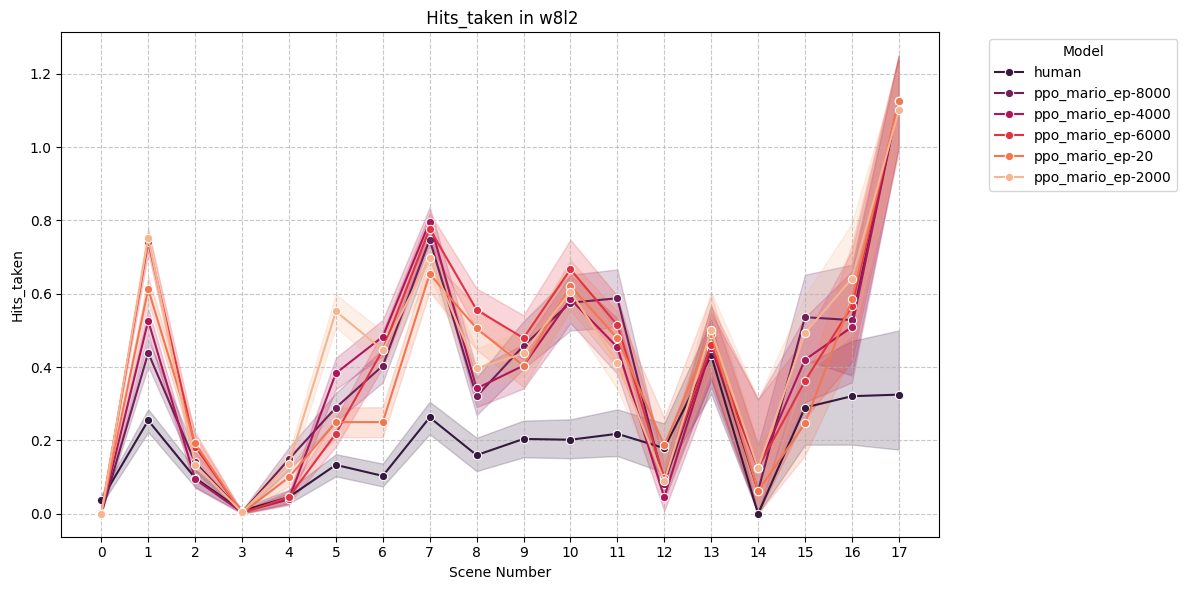

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_variable_by_scene(full_df, variable, level_name, ax=None, legend=True, split_by='Model', figsize=(12, 6), title_prefix=""):
    """
    Plots a specified variable across scenes for a given level, with different colors for each model.
    Scenes are ordered numerically on the x-axis, and any NaN scenes are removed.
    
    Parameters:
    -----------
    full_df : pandas DataFrame
        The full dataset containing the gameplay metrics
    variable : str
        The column name of the variable to plot (e.g., 'Cleared', 'Hits_taken', 'Duration')
    level_name : str
        The level to filter on (e.g., 'w1l1', 'w2l1')
    figsize : tuple, optional
        Figure size as (width, height)
    title_prefix : str, optional
        Prefix to add to the plot title
    
    Returns:
    --------
    matplotlib.figure.Figure
        The figure object
    """
    # Filter data for the specified level
    level_df = full_df[full_df['LevelFullName'] == level_name].copy()
    
    # Convert Scene to numeric for proper ordering
    level_df['Scene'] = pd.to_numeric(level_df['Scene'])
    
    if ax is None:
        # Create the plot
        fig, ax = plt.subplots(figsize=figsize)
    
    # Calculate mean values for each scene and model
    #grouped_df = level_df.groupby([split_by, 'Scene'])[(variable,)].mean().reset_index()
    grouped_df = level_df

    if split_by == 'Model':
        # Change to a continuous palette
        palette = sns.color_palette("rocket", len(grouped_df[split_by].unique()))
    else:
        # Use default palette for other categorical variables
        palette = sns.color_palette("Set2", len(grouped_df[split_by].unique()))

    # Plot with different colors for each model
    sns.lineplot(
        data=grouped_df,
        x='Scene',
        y=variable,
        hue=split_by,
        marker='o',
        palette=palette,
        ax=ax
    )
    
    # Improve the plot appearance
    title = f"{title_prefix} {variable} in {level_name}"
    ax.set_title(title)
    ax.set_xlabel('Scene Number')
    ax.set_ylabel(variable)
    
    # Force x-axis to have integer ticks at each scene number
    scene_values = sorted(level_df['Scene'].unique())
    ax.set_xticks(scene_values)
    
    # If plotting a boolean variable like 'Cleared', set y-axis limits appropriately
    if variable == 'Cleared' or level_df[variable].dtype == bool:
        ax.set_ylim(-0.05, 1.05)
    
    # Add grid for better readability
    ax.grid(True, linestyle='--', alpha=0.7)
    
    # Improve legend
    if legend:
        ax.legend(title=split_by, bbox_to_anchor=(1.05, 1), loc='upper left')
    else:
        ax.get_legend().remove()

    
    # Adjust layout to make room for the legend
    plt.tight_layout()
    
    if ax is None:
        return fig
    else:
        return ax

# Example usage:
fig = plot_variable_by_scene(full_df, 'Hits_taken', 'w8l2', split_by='Model')
plt.show()

/home/hyruuk/.local/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/hyruuk/.local/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/hyruuk/.local/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/hyruuk/.local/lib/python3.10/site-packages/seabor

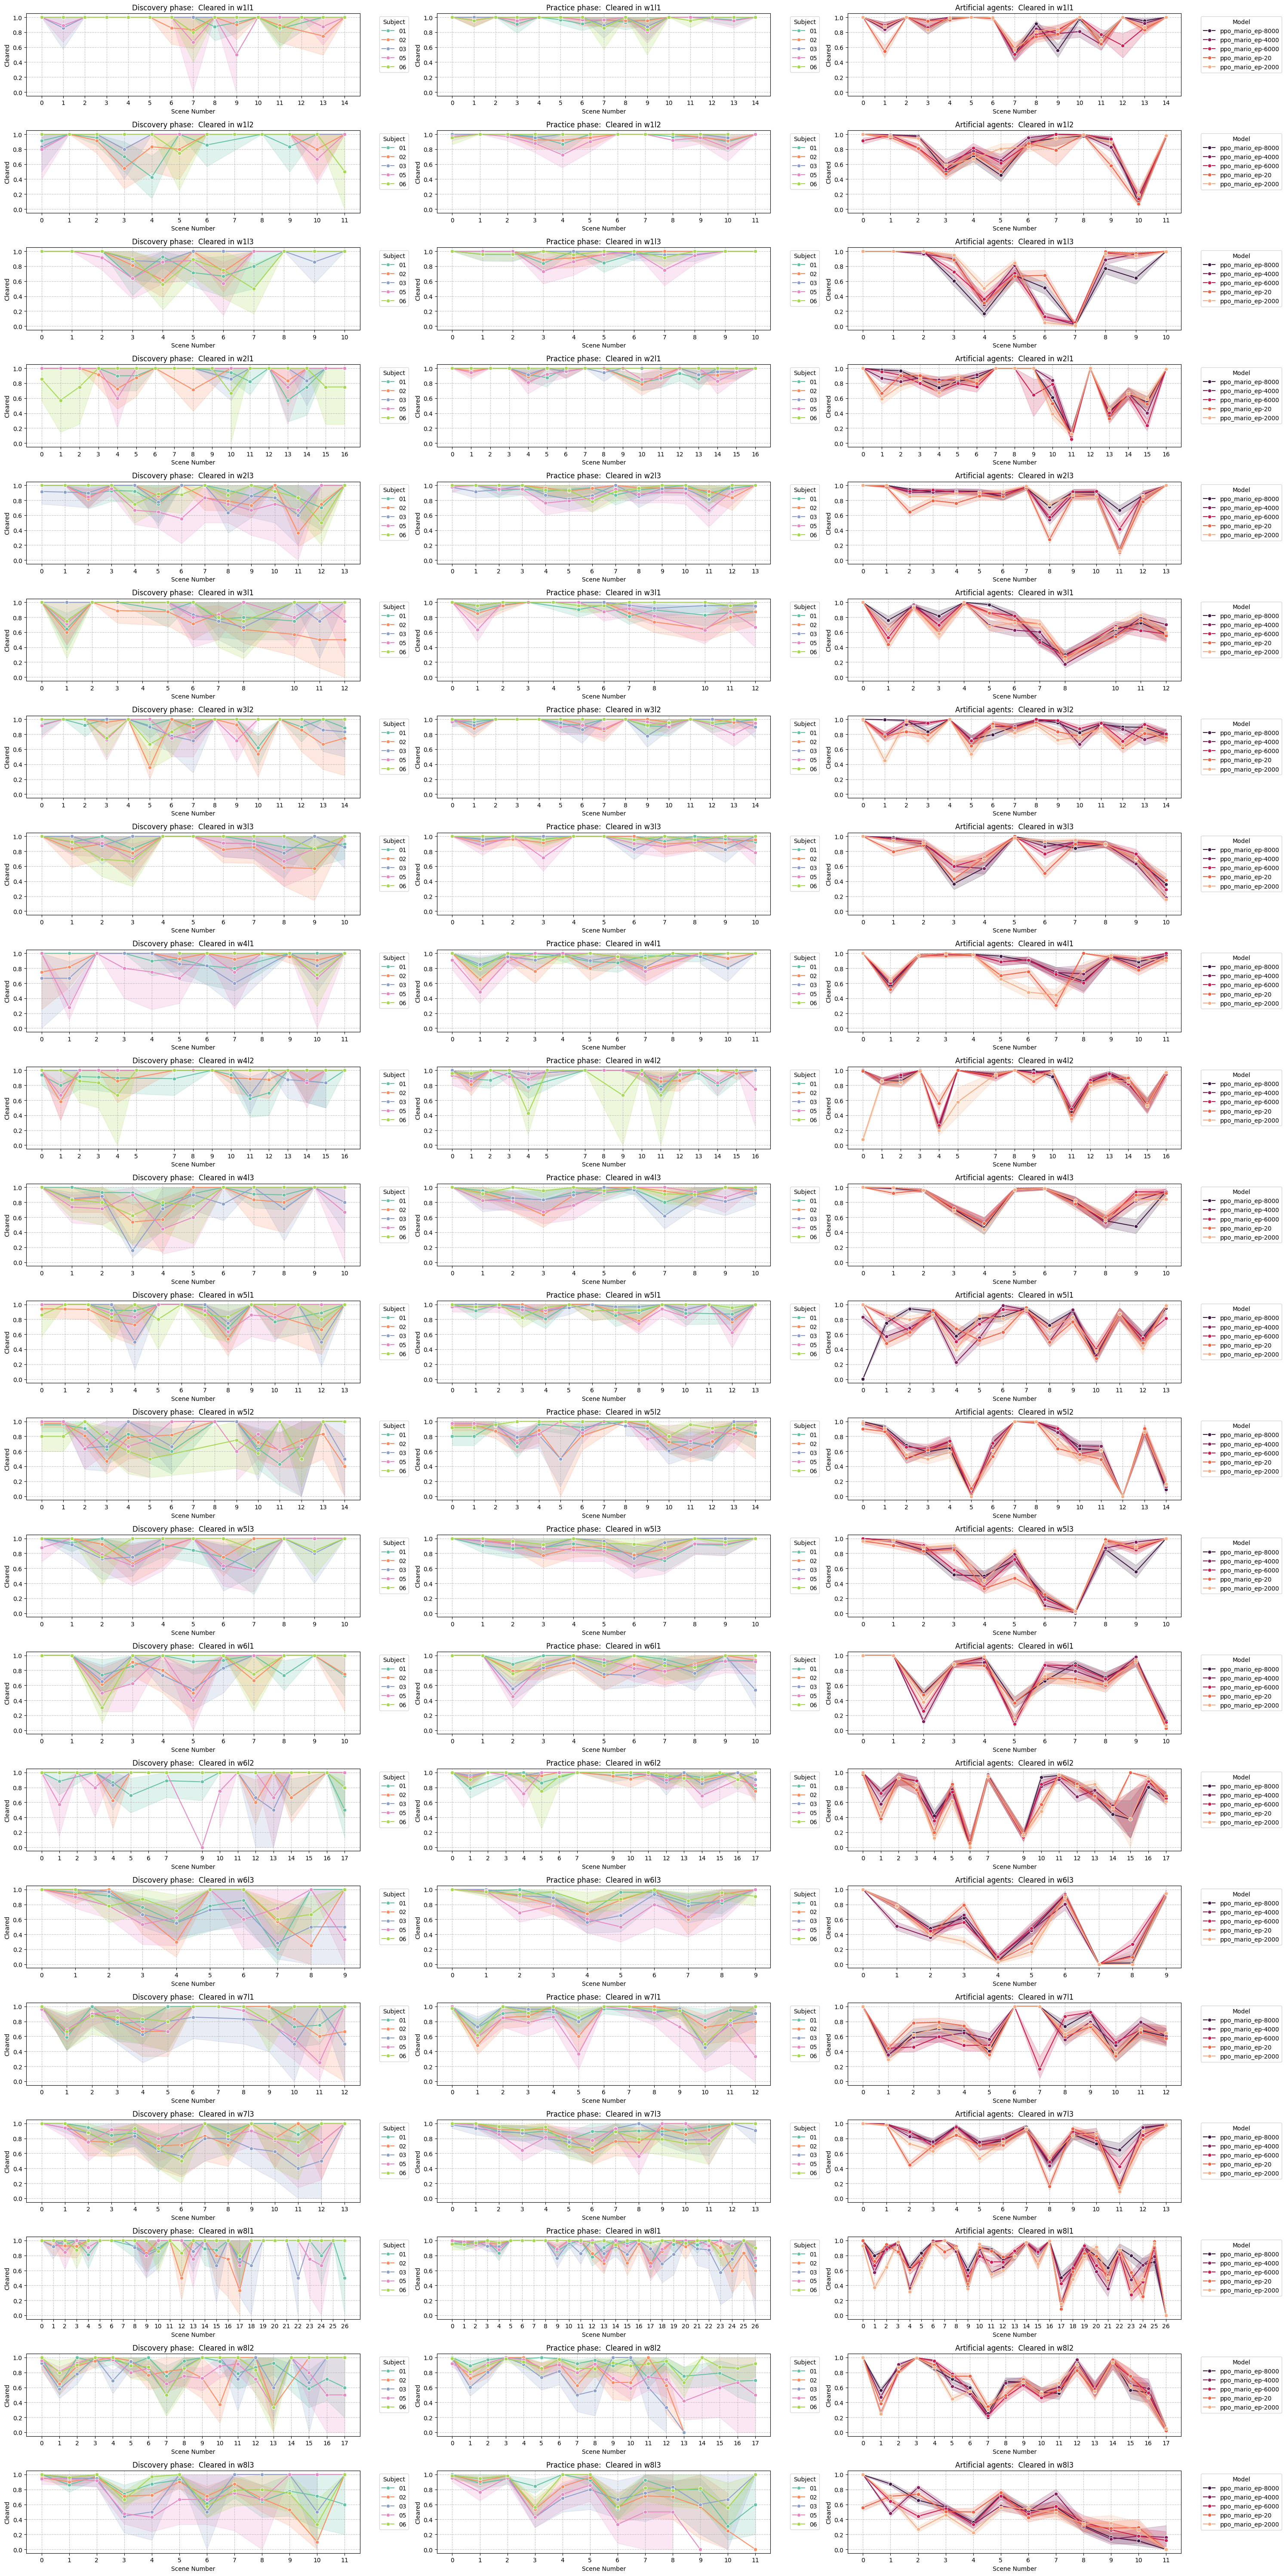

In [53]:
fig, axes = plt.subplots(22, 3, figsize=(30, 60))

levels_list = full_df['LevelFullName'].unique()

discovery_df = full_df[full_df['Phase'] == 'discovery']
for idx, level in enumerate(sorted(levels_list)):
    plot_variable_by_scene(discovery_df, 'Cleared', level, ax=axes[idx,0], split_by='Subject', legend=True, title_prefix='Discovery phase: ')

practice_df = full_df[full_df['Phase'] == 'practice']
for idx, level in enumerate(sorted(levels_list)):
    plot_variable_by_scene(practice_df, 'Cleared', level, ax=axes[idx,1], split_by='Subject', legend=True, title_prefix='Practice phase: ')

models_df = full_df[full_df['Model'] != 'human']
for idx, level in enumerate(sorted(levels_list)):
    plot_variable_by_scene(models_df, 'Cleared', level, ax=axes[idx,2], split_by='Model', legend=True, title_prefix='Artificial agents: ')


plt.show(fig)